In [1]:
from datetime import datetime
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

In [2]:
yfin.pdr_override()

In [3]:
df_tesla=pdr.get_data_yahoo('TSLA')

[*********************100%***********************]  1 of 1 completed


In [4]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-03-17,184.520004,186.220001,177.330002,180.130005,180.130005,132936600
2023-03-20,178.080002,186.440002,176.350006,183.250000,183.250000,129684400
2023-03-21,188.279999,198.000000,188.039993,197.580002,197.580002,153391400


In [5]:
## Simple moving average

<AxesSubplot:xlabel='Date'>

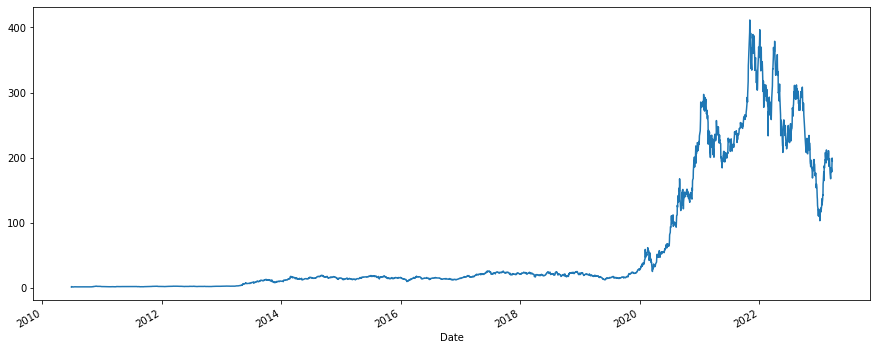

In [6]:
df_tesla['Open'].plot(figsize=(15,6))

In [7]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

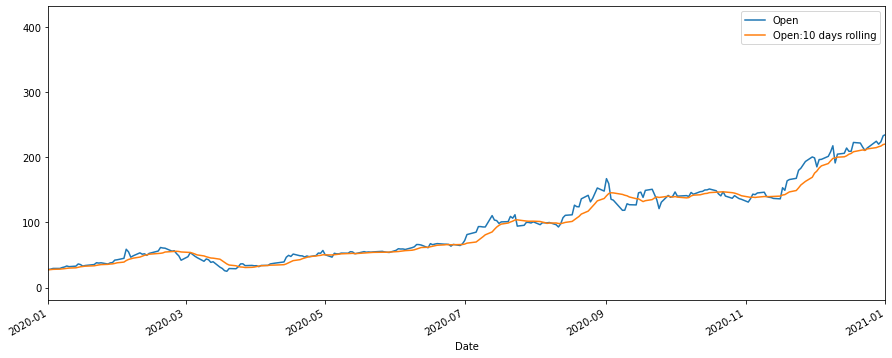

In [10]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [11]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

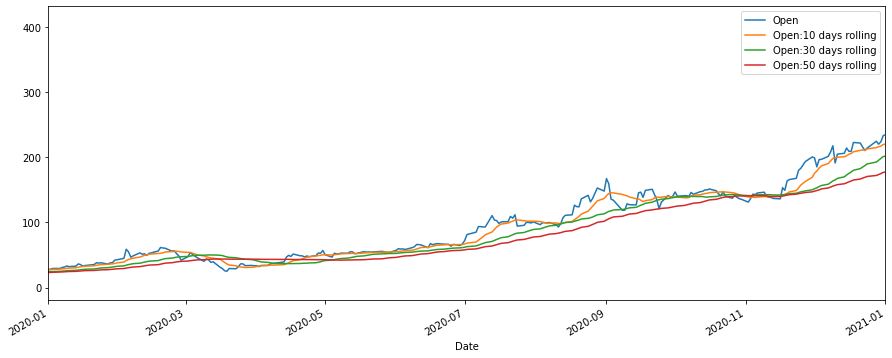

In [12]:
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [18]:
## Expanding
## Cumulative Moving Average (CMA)

<AxesSubplot:xlabel='Date'>

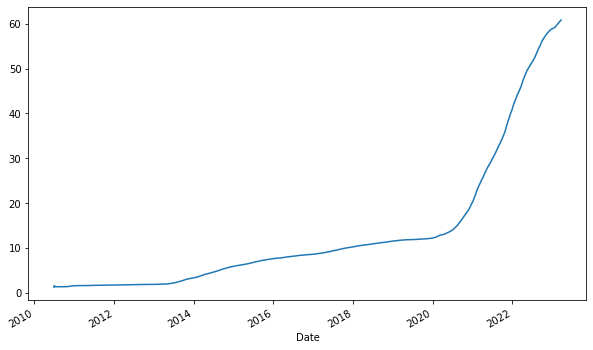

In [17]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,6))

In [19]:
## EWMA - Exponential Weighted Moving Average

In [20]:
## Let Smoothening factor = 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

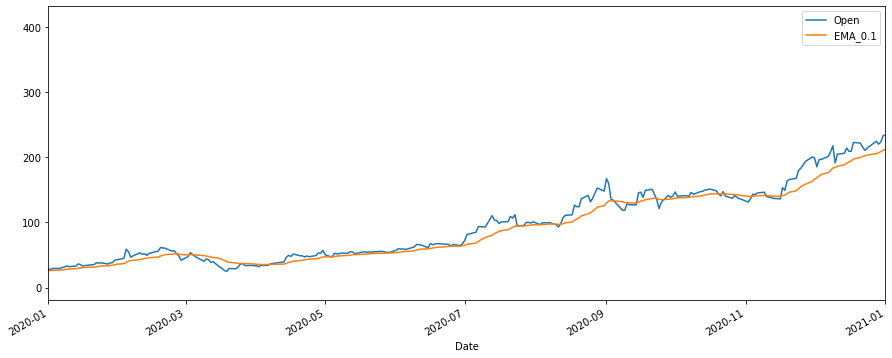

In [21]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [22]:
## Let smoothening factor = 0.3
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

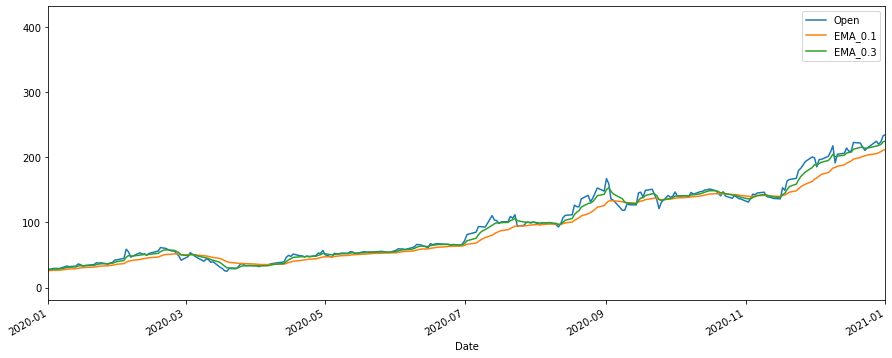

In [23]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [24]:
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

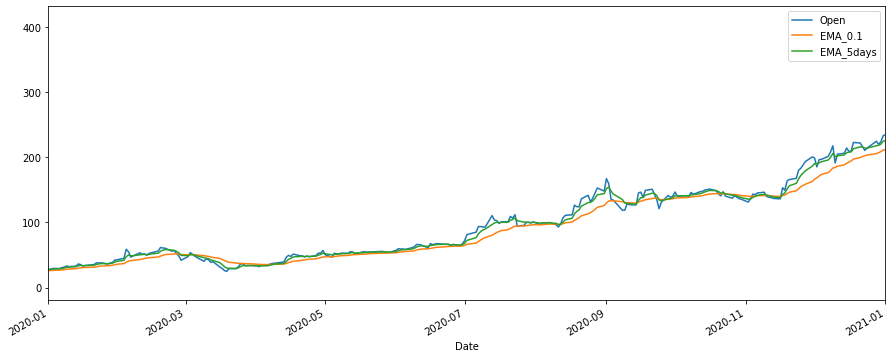

In [26]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))